In [14]:
import perceval as pcvl
import numpy as np
import matplotlib.pyplot as plt



In [217]:
# Calculate the probability of an outcome for detector
def calculate_proba(n,m,measure,allstateprobs_iterator):
    r"""
    gives the probability of an output measurement
    :param n: number of spatial states
    :param m: number of internal states
    :param measure: array of how much photon we expect for each captor (array 1,n)
    :param allstateprobs_iterator: An iterator containing states and probabilities of the simulation
    :return: float probability
    """
    Proba = 0
    k = 0
    theta = np.pi/4
    c = [np.cos(theta),np.sin(theta)]
    for state, probabilitie in allstateprobs_iterator:
        ls = list(state)
        #print(state,probabilitie)
        capt = []
        for i in range(n):
            capt.append(np.sum(ls[i::n]))
        #print(capt)
        if np.all(capt==measure):
            #print(state)
            #print(probabilitie)
            Proba += probabilitie
        k+=1
    return Proba

1/2*|1,1,0,0>+sqrt(3)/2*|1,0,0,1>


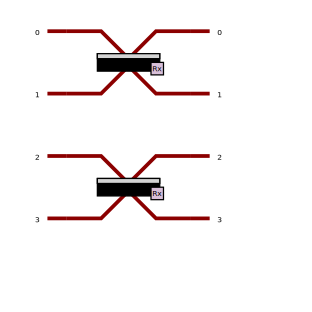

In [214]:
n = 2 #Nombre de modes spatiaux
m = 2 #Nombre de modes internes
k = 2 #Nombre de photon
circuit = pcvl.Circuit(n*m)
circuit.add((0,1), pcvl.BS())
circuit.add((2,3),pcvl.BS())

pcvl.pdisplay(circuit)
# Inputs as a list of list of fock states

Inputs = [[1,1,0,0],[1,0,0,1]]

#Coefficient in front of the inputs
theta = np.pi/3
c = [np.cos(theta),np.sin(theta)]
#Transform the inputs in statevector
k=0
for i in Inputs:
    if k == 0 :
        InputsBS = pcvl.BasicState(i)
    else :
        InputsBS = InputsBS + pcvl.BasicState(i)
    k+=1
#Add the coefficient in the state vector
for state,amplitude in InputsBS.items():

    InputsBS[state] = amplitude*c[k]
    k+=1

#Get backend and simulate
backend = pcvl.BackendFactory.get_backend("Naive")

simulator = backend(circuit)

pcvl.pdisplay(circuit)

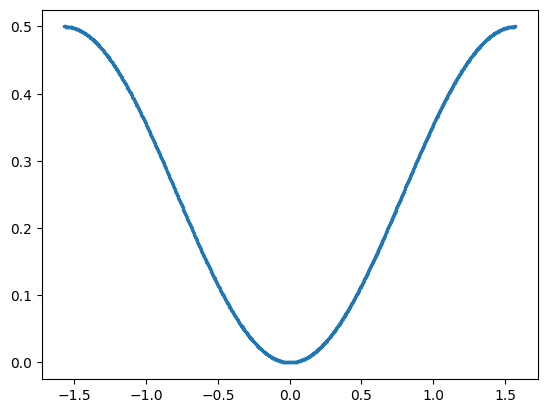

In [221]:
theta = np.linspace(-np.pi/2,np.pi/2,1000)
Proba = []
for i in range(len(theta)):
    c = [np.cos(theta[i]),np.sin(theta[i])]
    #Transform the inputs in statevector
    k = 0
    for ii in Inputs:
        if k == 0 :
            InputsBS = pcvl.BasicState(ii)
        else :
            InputsBS = InputsBS + pcvl.BasicState(ii)
        k+=1
    #Add the coefficient in the state vector
    k = 0
    for state,amplitude in InputsBS.items():

        InputsBS[state] = amplitude*c[k]
        k+=1

    #Get backend and simulate
    backend = pcvl.BackendFactory.get_backend("Naive")

    simulator = backend(circuit)
    Sol = simulator.allstateprob_iterator(InputsBS)
    Proba.append(calculate_proba(n,m,[1,1],Sol))

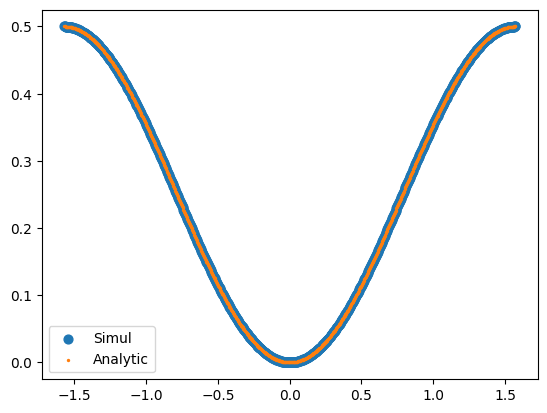

In [225]:
plt.scatter(theta,Proba,40,label = 'Simul')
plt.scatter(theta,np.sin(theta) ** 2/2,2,label = 'Analytic')
plt.legend()
plt.show()

In [113]:
import itertools
m = 3
k = 2
L = k*m 

Inputs = []
for x in itertools.combinations(range(L), k) :
    Inputs.append([1 if i in x else 0 for i in range(L)])

In [114]:

New = []

for i in range(len(Inputs)):
    a=0
    for ii in range(n):
        if np.sum(Inputs[i][ii::n]) <= 1:
            a += 1
    if a == 2:
        New.append(Inputs[i])
print(New)


[[1, 1, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1], [0, 1, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 1]]


In [115]:
theta = np.pi/3
C1 = [1, 0, 1]
C2 = [np.cos(theta), np.sin(theta), np.tan(theta)]
c = []
Arr = np.squeeze(np.array([[C1],[C2]]))
n = np.size(Arr,0)
m = np.size(Arr,1)
for i in range(len(New)):
    ArrCond = np.array(New[i]).reshape(m,n).T
    y = np.ma.masked_array(Arr, abs(ArrCond-1))
    c.append(np.prod(y))


In [117]:
print(New)
print(c)

[[1, 1, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1], [0, 1, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 1]]
[0.5000000000000001, 0.8660254037844386, 1.7320508075688767, 0.0, 0.5000000000000001, 0.0, 0.0, 0.8660254037844386, 1.7320508075688767]


In [ ]:
#Propre :

